<a href="https://colab.research.google.com/github/ofar27/Loan_App/blob/main/credit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importer les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

In [2]:
#Lire la base de donnees
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [8]:
pd.set_option('display.max_rows',10)

In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
#voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
...,...
Education,0
ApplicantIncome,0
CoapplicantIncome,0
Property_Area,0


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
#renseigner les valeurs manquantes
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
     cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [11]:
# Remplacer les valeurs manquantes par la valeur la plus fréquente dans chaque colonne catégorielle
cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

# Vérifier s'il reste des valeurs manquantes
cat_data.isnull().sum().any()

False

In [12]:
cat_data['Married'].value_counts()

,count
Married,
Yes,401
No,213


In [13]:
# pour les variables num on les remplace par la val precedente de la mm colonne
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()


<ipython-input-13-e9484bdff5b2>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill',inplace=True)


False

In [14]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [15]:
#Transformer le cononne target
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target


,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [16]:
#Remplacer les val categoriques par des val num
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [17]:
# Supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [18]:
#Concatener cat_Data et num_data et specifier la colonne target
x=pd.concat([cat_data,num_data],axis=1)
y=target

In [19]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [20]:
# on commence par la varieble target
target.value_counts()

,count
Loan_Status,
1,422
0,192


In [21]:
#la base de données utilisée pour EDA
df=pd.concat([cat_data,num_data,target],axis=1)

<ipython-input-22-c22412c91a03>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, palette=['blue', 'red'])


Le pourcentage des crédits accordés est: 68.73%
Le pourcentage des crédits non accordés est: 31.27%


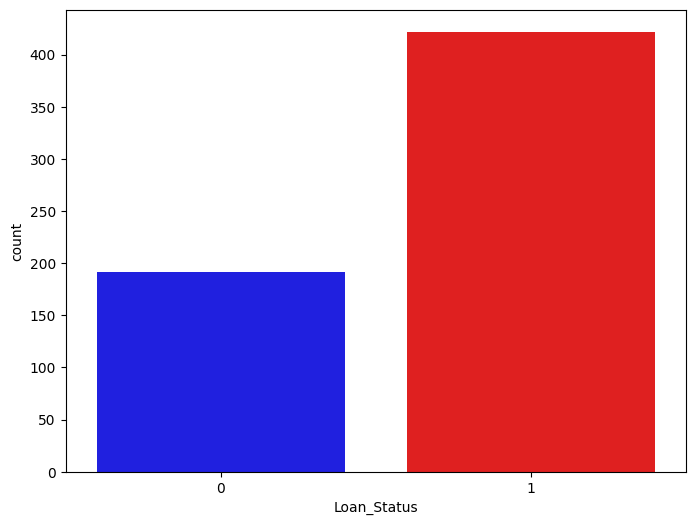

In [22]:
# Créer la figure et la taille du graphique
plt.figure(figsize=(8,6))

# Créer le graphique avec sns.countplot
# Palette spécifie les couleurs à utiliser
sns.countplot(x=target, palette=['blue', 'red'])

# Calculer les pourcentages pour chaque catégorie
value_counts = target.value_counts()
yes = value_counts.iloc[0] / len(target)  # Première catégorie
no = value_counts.iloc[1] / len(target)   # Deuxième catégorie

# Afficher les pourcentages
print(f'Le pourcentage des crédits accordés est: {yes * 100:.2f}%')
print(f'Le pourcentage des crédits non accordés est: {no * 100:.2f}%')

# Afficher le graphique
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


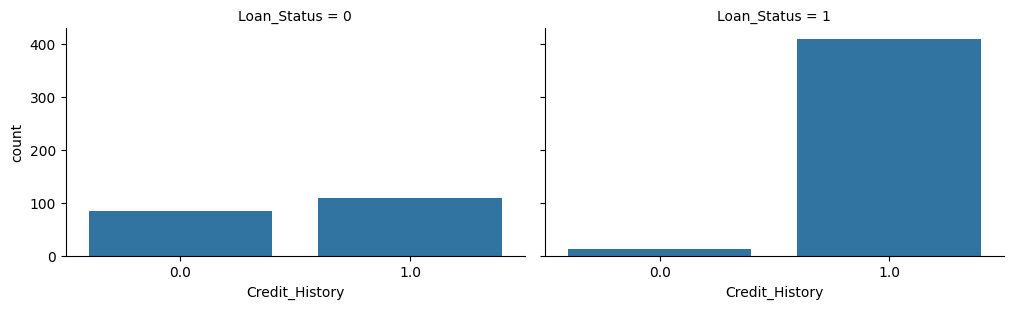

In [23]:
#Credit history
# Créer le FacetGrid
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)

# Mapper les countplots sur chaque sous-graphe
grid.map(sns.countplot, 'Credit_History')

# Afficher le graphique
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


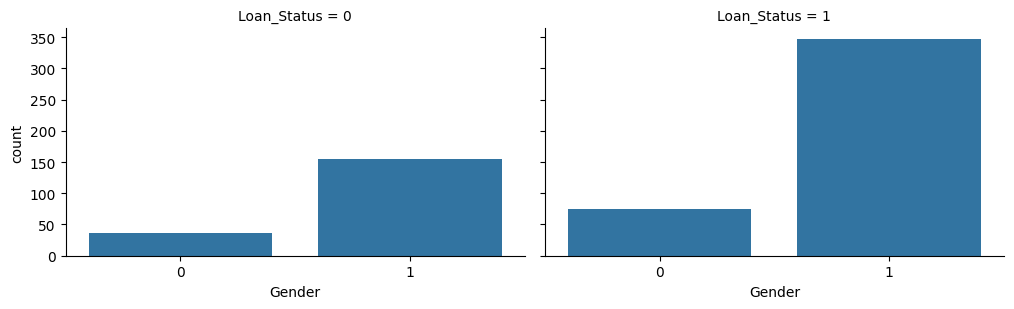

In [24]:
#sexe
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


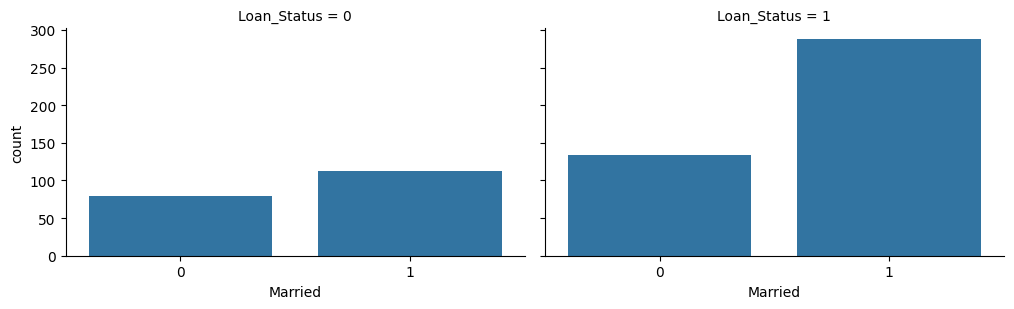

In [25]:
#situation fam
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')

In [ ]:
#ecart relativement faible

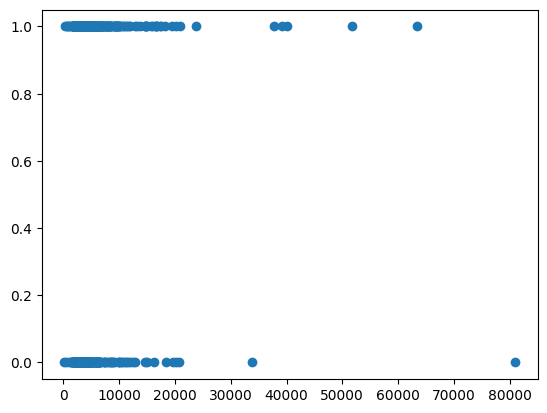

In [26]:
#revenue de demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

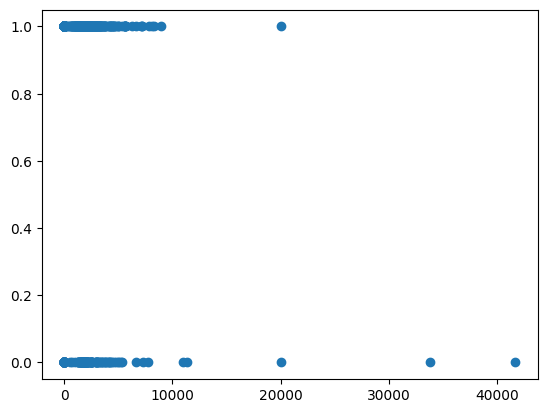

In [27]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [28]:
df.groupby('Loan_Status').median() #pour ne pas avoir l'impact des val adherentes

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [29]:
# Diviser la base de données en une base de données test et une d'entraînement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print('x_train taille:', x_train.shape)
print('x_test taille:', x_test.shape)
print('y_train taille:', y_train.shape)
print('y_test taille:', y_test.shape)


x_train taille: (491, 11)
x_test taille: (123, 11)
y_train taille: (491,)
y_test taille: (123,)


In [30]:
#on va appliquer trois algorithmes logistic regression, KMN, DecisionTree
models={
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'Decision tree Classifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}
# La fonction de précision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
    print(f'la precision du modèle est: {acc}')
# c la fonction dapplication des modeles
def train_test_eval(models,x_train,y_train,x_test,y_test):
  for name,models in models.items():
    print(name,':')
    models.fit(x_train,y_train)
    accu(y_test,models.predict(x_test))
    print('-*30')

train_test_eval(models,x_train,y_train,x_test,y_test)



LogisticRegression :
la precision du modèle est: 0.8536585365853658
-*30
KNeighborsClassifier :
la precision du modèle est: 0.6504065040650406
-*30
Decision tree Classifier :
la precision du modèle est: 0.8455284552845529
-*30


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
x_2=x[['Credit_History','Married','CoapplicantIncome',]]

In [32]:
# Diviser la base de données en une base de données test et une d'entraînement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in sss.split(x_2, y):
    x_train, x_test = x_2.iloc[train_index], x_2.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print('x_train taille:', x_train.shape)
print('x_test taille:', x_test.shape)
print('y_train taille:', y_train.shape)
print('y_test taille:', y_test.shape)

x_train taille: (491, 3)
x_test taille: (123, 3)
y_train taille: (491,)
y_test taille: (123,)


In [ ]:
train_test_eval(models,x_train,y_train,x_test,y_test)


LogisticRegression :
la precision du modèle est: 0.8536585365853658
-*30
KNeighborsClassifier :
la precision du modèle est: 0.6991869918699187
-*30
Decision tree Classifier :
la precision du modèle est: 0.8455284552845529
-*30


In [33]:
#appliquer la regression logistique sur notre base de donnees
# Entraîner le modèle avec les données d'entraînement
Classifier = LogisticRegression()
Classifier.fit(x_2,y)  # Utilise x_train et y_train pour l'entraînement


LogisticRegression()

In [34]:
# enregister le modele
pickle.dump(Classifier,open('model.pkl','wb'))